<a href="https://colab.research.google.com/github/alekya0221/DS_Python_ExcelR/blob/main/KMeans_Mar24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importing Dataset
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Independent Variables --- are Salary and Spending Score
X = dataset.iloc[:,[3,4]].values

In [ ]:
#No splitting required as there is no accuracy.

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#Feature Scaling is not required

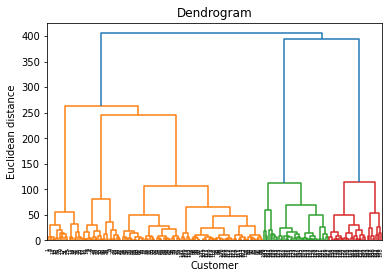

In [ ]:
#Fitting the model
#finding the Optimal Number of Clusters
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Fitting Heirarchial Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc
#since we gave clusters=5 we have the cluster indexes from 0 to 4. 
#Heirarchial clustering doesnt work on centroids. (fr next step)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

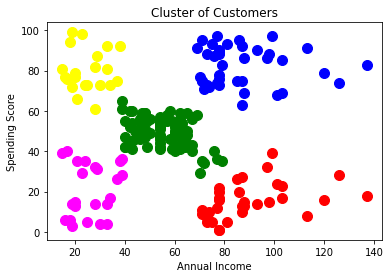

In [ ]:
#Visualizing the Clusters

plt.scatter(X[y_hc == 0, 0],X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

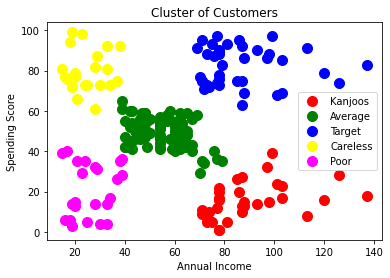

In [ ]:
#Visualizing the Clusters

plt.scatter(X[y_hc == 0, 0],X[y_hc == 0, 1], s = 100, c = 'red', label = 'Kanjoos')
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1, 1], s = 100, c = 'green', label = 'Average')
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2, 1], s = 100, c = 'blue', label = 'Target')
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Careless')
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Poor')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [ ]:
Confusion Matrix 

Decision Tree
[[62  6]
 [ 3 29]]
Random Forest 
[[63  5]
 [ 4 28]]